In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import sys
import os

# Add the parent directory to the system path
parent_directory = os.path.abspath(os.path.join(os.getcwd(), '../../'))
sys.path.append(parent_directory)

from plotting import plot_phase_plane, plot_velocity_expression

In [2]:
datasets = ["forebrain", "pancreas", "gastrulation_erythroid", "dentategyrus_lamanno_P5"]
cell_type_keys = ["Clusters", "clusters", "celltype", "clusters"]
model_names = ["imVelo", "lsvelo", "celldancer", "deepvelo", "ivelo", "ivelo_filtered", "velovi", "velovi_filtered", "scvelo", "stochastic"]

#for dataset, cell_type_key in zip(datasets, cell_type_keys):
#    os.makedirs(f"plots/{dataset}", exist_ok=True) 

dataset = "gastrulation_erythroid"
cell_type_key = "clusters"
model_name = "imVelo"
K = 31

adata = sc.read_h5ad(f"../../benchmark/imVelo/{dataset}/{model_name}_{dataset}.h5ad")

['Tram1',
 'Rpl7',
 'Mcm3',
 'Prim2',
 'Rev1',
 'Sf3b1',
 'Hspd1',
 'Orc2',
 'Ndufs1',
 'Fn1',
 'Farsb',
 'Cul3',
 'Trip12',
 'Hjurp',
 'Ndufa10',
 'Dtymk',
 'Ptpn4',
 'Tmem163',
 'Mcm6',
 'Dars',
 'Mapkapk2',
 'Srgap2',
 'Tmcc2',
 'Snrpe',
 'Timm17a',
 'Smg7',
 'Lamc1',
 'Dars2',
 'Pou2f1',
 'Uck2',
 'Pbx1',
 'Atf6',
 'Sdhc',
 'Adss',
 'Hnrnpu',
 'Tfb2m',
 'Ahctf1',
 'H3f3a',
 'Lbr',
 'Enah',
 'Iars2',
 'Cenpf',
 'Ppp2r5a',
 'Tcea1',
 'Atp6v1h',
 'Rb1cc1',
 'Cspp1',
 'Terf1',
 'Cox5b',
 'Eif5b',
 'Rpl31',
 'Tpp2',
 'Ndufb3',
 'Eef1b2',
 'Creb1',
 'Rpe',
 'Atic',
 'Xrcc5',
 'Rpl37a',
 'Cab39',
 'Psmd1',
 'Eif4e2',
 'Agap1',
 'Ube2f',
 'Clasp1',
 'Ube2t',
 'Uchl5',
 'Tpr',
 'Glul',
 'Abl2',
 'Aldh9a1',
 'Pfdn2',
 'Copa',
 'Pex19',
 'Spta1',
 'Exo1',
 'Parp1',
 'Taf1a',
 'Eprs',
 'Fbxo5',
 'Tab2',
 'Vta1',
 'Rps12',
 'Tpd52l1',
 'Slc16a10',
 'Amd1',
 'Cdc40',
 'Hk1',
 'Ccar1',
 'Cdk1',
 'Tfam',
 'Pcnt',
 'Pfkl',
 'Polr2e',
 'Uqcr11',
 'Tcf3',
 'Timm13',
 'Hmg20b',
 'Hsp90b1',
 'Snrpf',
 

In [3]:
genes_pancreas = [
    "Gnas",
    "Gnao1"
    "Ank3",
    "Cald1",
    "Hsp90b1",
    "Pex5l",
    "Snrnp70", #spliced
    "Stx16", #spliced,
    "Cck",
    "Spp1"
]

genes_gastrulation = [
    "Rap1b",
    "Hba-x"
]

genes_forebrain = [
    "Gnas"
]

genes_dentategyrus_lamanno_P5 = [
    "Ryr2"
]

In [28]:
!ls ../../

__pycache__	     data	     loss.py	 plotting.py	   thesis
alternative_results  dataloaders.py  metrics.py  preprocessing.py  train.py
benchmark	     downstream      model.py	 reproducibility   utils.py
checkpoints	     inputs	     modules.py  run.py


In [23]:
list(np.sort(list(adata.var_names)))

['Aaas',
 'Aak1',
 'Aars',
 'Aatf',
 'Abcb10',
 'Abcg2',
 'Abl1',
 'Abl2',
 'Acaca',
 'Acat2',
 'Acer3',
 'Acin1',
 'Acly',
 'Aco2',
 'Acot8',
 'Acp5',
 'Actb',
 'Actn1',
 'Actn4',
 'Actr1a',
 'Adam10',
 'Adam17',
 'Adcy9',
 'Add1',
 'Adk',
 'Adsl',
 'Adss',
 'Agap1',
 'Agpat4',
 'Agpat5',
 'Agps',
 'Ahctf1',
 'Aimp1',
 'Aimp2',
 'Ak2',
 'Ak3',
 'Akap1',
 'Akap13',
 'Akap8l',
 'Akap9',
 'Akt2',
 'Alad',
 'Alas2',
 'Aldh18a1',
 'Aldh7a1',
 'Aldh9a1',
 'Aldoa',
 'Alg13',
 'Alg14',
 'Alg8',
 'Alg9',
 'Alkbh2',
 'Amd1',
 'Anapc1',
 'Anapc10',
 'Anapc11',
 'Anapc13',
 'Anapc4',
 'Anapc5',
 'Anapc7',
 'Ank1',
 'Ank3',
 'Anln',
 'Anp32a',
 'Ap1g1',
 'Ap1s1',
 'Ap2a1',
 'Ap2a2',
 'Ap2b1',
 'Ap3b1',
 'Apc',
 'Apex1',
 'Apoe',
 'Appl1',
 'Aprt',
 'Arf1',
 'Arfgap1',
 'Arhgap10',
 'Arhgap17',
 'Arhgap21',
 'Arhgap35',
 'Arhgef12',
 'Arid4a',
 'Arih1',
 'Arih2',
 'Arrb1',
 'Asb3',
 'Ass1',
 'Atf1',
 'Atf2',
 'Atf6',
 'Atg12',
 'Atg5',
 'Atic',
 'Atm',
 'Atp1a1',
 'Atp1b3',
 'Atp2a2',
 'Atp5a1',
 '

In [20]:
ciao

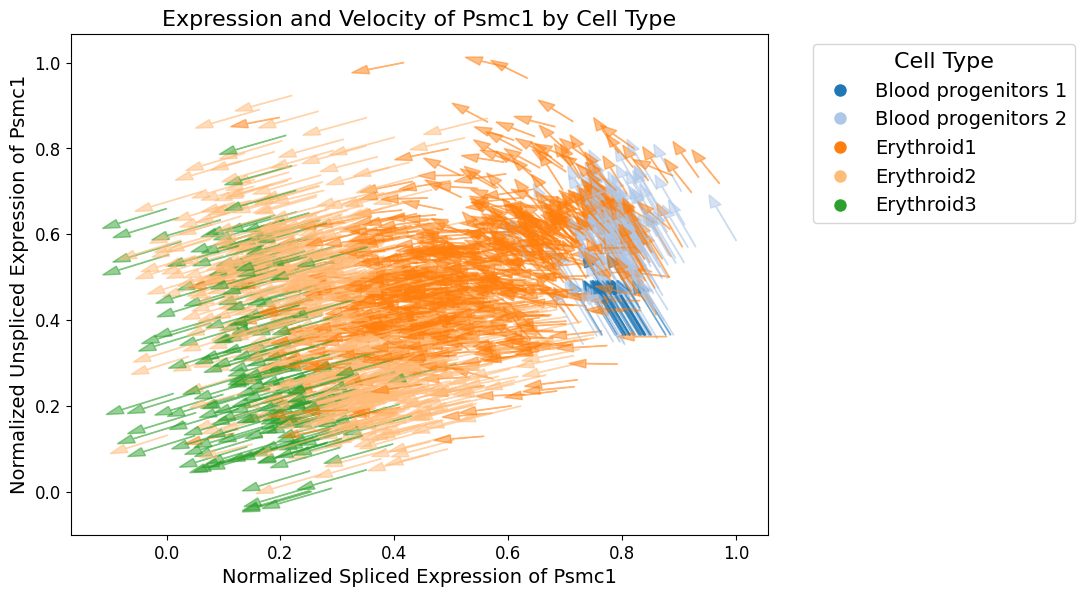

In [27]:
gene_name =  "Psmc1"
plot_phase_plane(adata, gene_name, u_scale=0.1, s_scale=0.1, 
                 cell_type_key="celltype", dataset=dataset, 
                 K=11, save_path= f"phase_planes/{model_name}/{dataset}/{gene_name}.png", 
                 save_plot=False)

In [25]:
def plot_velocity_expression(adata, gene_name, plot_type="spliced", normalize_y=True, normalize_velocity=True, 
                             title_fontsize=16, axis_fontsize=14, legend_fontsize=12, tick_fontsize=12, 
                             legend_title_fontsize=14, cell_type_key="clusters", save_path=".", save_plot=False):
    """
    Function to plot either the unspliced or spliced velocity and expression, with options for normalization.
    
    Parameters:
        adata: AnnData object
        gene_name: Name of the gene to plot
        plot_type: Either "unspliced" or "spliced" to choose which data to plot
        normalize_y: Whether to min-max normalize the expression data
        normalize_velocity: Whether to min-max normalize the velocity data
        title_fontsize: Font size for the title
        axis_fontsize: Font size for the axes labels
        legend_fontsize: Font size for the legend
        tick_fontsize: Font size for the tick labels
        legend_title_fontsize: Font size for the legend title
    """
    # Retrieve the data
    x = -1*adata.obs["isomap_1"]
    
    if plot_type == "unspliced":
        y_velocity = adata.layers["velocity_u"][:, adata.var_names == gene_name].flatten()
        y_expr = adata.layers["Mu"][:, adata.var_names == gene_name].flatten()
        expression_label = "Unspliced"
    else:
        y_velocity = adata.layers["velocity"][:, adata.var_names == gene_name].flatten()
        y_expr = adata.layers["Ms"][:, adata.var_names == gene_name].flatten()
        expression_label = "Spliced"
    
    # Normalize the expression data if required
    if normalize_y:
        y_expr_min, y_expr_max = y_expr.min(), y_expr.max()
        y_expr = (y_expr - y_expr_min) / (y_expr_max - y_expr_min)
        #  # Scaling for better visualization
    
    # Normalize the velocity data if required
    if normalize_velocity:
        y_velocity_min, y_velocity_max = y_velocity.min(), y_velocity.max()
        y_velocity = (y_velocity - y_velocity_min) / (y_velocity_max - y_velocity_min)

    y_expr = y_expr + 0.5
    y_velocity *= 10
    # Get the cluster labels and corresponding colors
    clusters = adata.obs[cell_type_key]
    cluster_colors = adata.uns[f"{cell_type_key}_colors"]
    
    # Map clusters to colors
    cluster_color_map = {cluster: color for cluster, color in zip(clusters.cat.categories, cluster_colors)}
    colors = clusters.map(cluster_color_map)
    
    # Create a plot
    plt.figure(figsize=(8, 6))
    
    # Scatter for velocity with cluster-based colors
    plt.scatter(x, y_velocity, label=f"{expression_label} velocity", c=colors, cmap='viridis', alpha=0.6)
    
    # Scatter for expression with black edge color
    plt.scatter(x, y_expr, label=f"{expression_label} expression", edgecolor='black', c=colors, facecolors='none')
    
    # Add labels and legend
    plt.title(f"{expression_label} velocity and expression for {gene_name}", fontsize=title_fontsize)
    plt.xlabel("isomap_1", fontsize=axis_fontsize)
    
    ylabel_text = f"Normalized {gene_name} {expression_label.lower()} expression and velocity" if normalize_y or normalize_velocity else f"{gene_name} {expression_label.lower()} expression and velocity"
    plt.ylabel(ylabel_text, fontsize=axis_fontsize)
    
    # Adjust tick font size
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)
    
    # Add a legend for the velocity and expression
    plt.legend(fontsize=legend_fontsize, loc='upper right')

    if save_plot:
        plt.savefig(save_path)
    
    plt.tight_layout()
    plt.show()

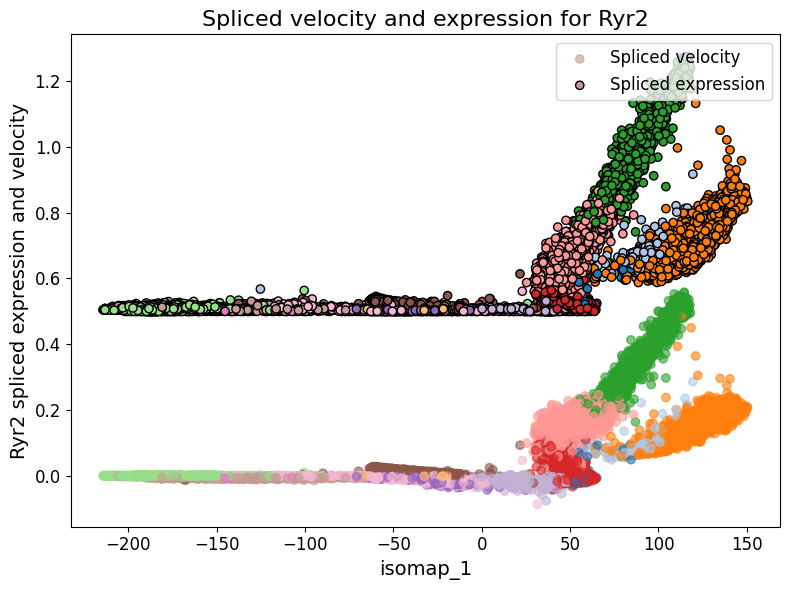

In [26]:
plot_type = "spliced"
os.makedirs(f"overlayed/{model_name}/{dataset}", exist_ok=True)

plot_velocity_expression(adata, gene_name=gene_name, plot_type=plot_type, 
                         normalize_y=False, normalize_velocity=False,
                         cell_type_key=cell_type_key, 
                         save_path=f"overlayed/{model_name}/{dataset}/{gene_name}_{plot_type}.png", 
                         save_plot=True)